In [1]:
import numpy as np
import os, json, re
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import gmean
from cycler import cycler
import statistics
import seaborn as sns
import matplotlib.patches as mpatches
import os
cwd = os.getcwd()


# Read IEA data 

In [2]:
# GW get information about the electricity capacity in the US
elec_gen = pd.read_csv(cwd+"/data/capacity.csv") # from IAE
elec_gen = elec_gen.T
header_row = 0
elec_gen.columns = elec_gen.iloc[header_row]
elec_gen.head()
elec_gen.columns = ['coal', 'gas', 'wind', 'diesel', 'nuclear','hydro', 'oil', 'solar', 'total']

In [3]:
# Bln kwh get information about the electricity generation in the US
gen = pd.read_csv(cwd+"/data/generation.csv") # from IEA
gen = gen.T
header_row = 0
gen.columns = gen.iloc[header_row]
gen.columns = ['coal', 'gas', 'wind', 'nuclear','hydro', 'oil', 'solar', 'total']


In [4]:
gen=gen.apply(pd.to_numeric, errors='coerce')
gen=gen.iloc[1: , :].dropna(how='all')
gen=gen.iloc[: , :-1] #drop the last "Total" column
gen.to_csv('generation.csv')

In [5]:
gen1 = gen/1000

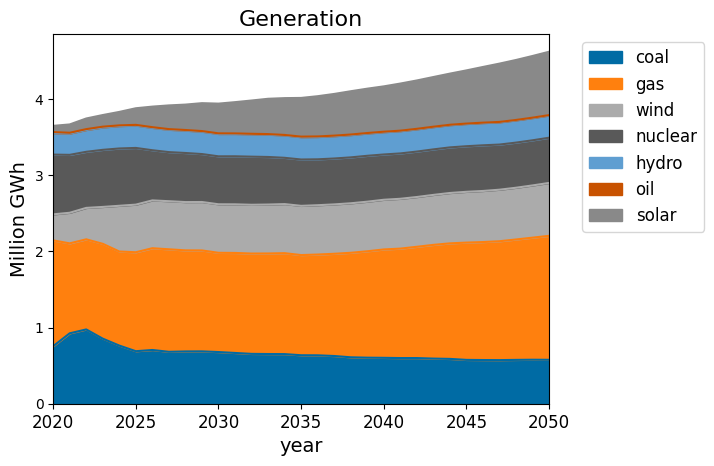

In [6]:
#def_cycler = (cycler(color = ['r', 'g', 'b', 'y', 'c', 'gold', 'm']))
plt.style.use('tableau-colorblind10')
gen1.plot.area()
plt.xlim([0, 30])
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes')
plt.title("Generation", fontsize = 16)

plt.xticks(fontsize=12 )
plt.xlabel("year", fontsize = 14)
plt.ylabel("Million GWh", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
plt.savefig('./plots/generation.jpg', bbox_inches='tight', dpi=900)

In [7]:
elec_gen

,coal,gas,wind,diesel,nuclear,hydro,oil,solar,total
Sourse,Coal,Gas_cc,Wind,Combustion Turbine/Diesel,Nuclear,Hydroelectric Power,Oil and Natural Gas Steam,Solar PV,Total
2020,217.3,245.4,126.5,140,97.1,79.2,72.6,48.5,"1,061.60"
2021,212.9,248.7,134.1,151.4,92.5,79.3,71.5,60.4,"1,089.60"
2022,208.2,261.3,136.6,157.5,92.9,79.3,66.6,76.4,"1,120.90"
2023,188.3,264.7,163.1,163.4,92.9,79.3,61.9,82.1,"1,139.70"
2024,176.8,268.7,196.2,167.7,93,79.3,56.5,92.4,"1,176.00"
2025,136,282.7,196.5,179.7,91.9,79.3,56.3,110.4,"1,179.70"
2026,131.6,295.2,197.2,184.2,80.7,79.3,52,130.4,"1,198.70"
2027,125.5,301,198.1,188.9,78.8,79.3,51.5,145.9,"1,218.50"
2028,122.9,304.3,198.7,192,78.8,79.3,49.5,153.2,"1,231.40"


In [8]:
elec_gen=elec_gen.apply(pd.to_numeric, errors='coerce')
elec_gen=elec_gen.iloc[1: , :].dropna(how='all')
elec_gen=elec_gen.dropna(how='all', axis=1)

In [9]:
new_cols = ["coal",	"gas",	"wind", "nuclear", "hydro",	"oil","solar","diesel"]
elec_gen=elec_gen[new_cols]
elec_gen=elec_gen.iloc[: , :-1] #drop the last "Total" column


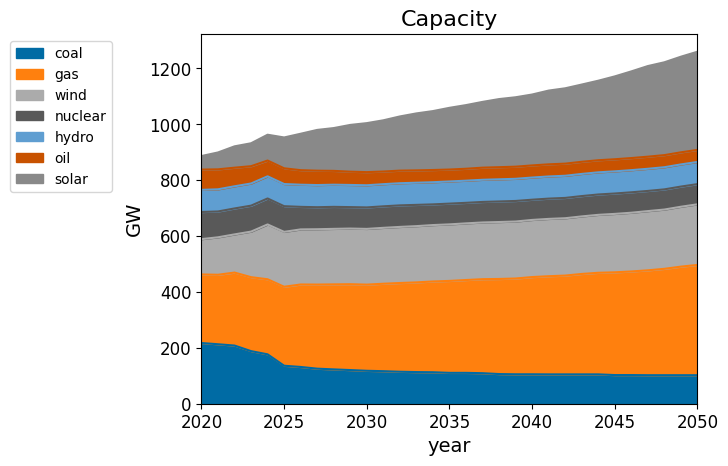

In [10]:
#def_cycler1 = (cycler(color = ['b', 'g', 'b', 'coral', 'y', 'c', 'gold', 'm']))

plt.style.use('tableau-colorblind10')
elec_gen.plot.area()
plt.rc('axes')
plt.xlim([0, 30])
fontsize = 12
plt.title("Capacity", fontsize = 16)
plt.xlabel("year", fontsize = 14)
plt.ylabel("GW", fontsize = 14)
plt.legend(bbox_to_anchor=(-0.4, 1), loc='upper left', prop={'size': 10})
plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )
plt.savefig('./plots/capacity.jpg', bbox_inches='tight', dpi=900)

elec_gen.to_csv('capacity.csv')
gen.to_csv('generation.csv')

# find the decomissioning and constructions

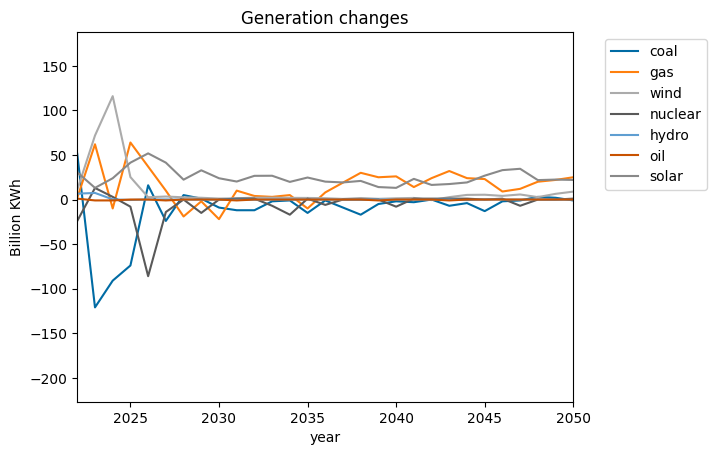

In [11]:
chang_g = gen.diff()  #find difference in annual generation
chang_g.plot()
plt.title("Generation changes")
plt.xlabel("year")
plt.ylabel("Billion KWh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([2, 30])
plt.show()

(2.0, 30.0)

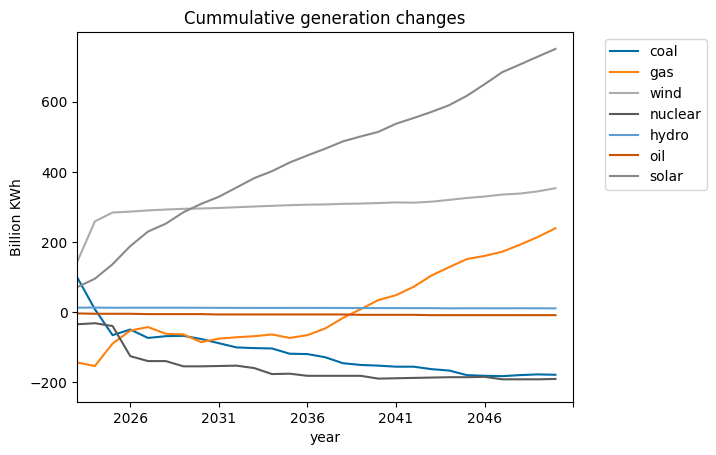

In [12]:
g=chang_g.iloc[1: , :].cumsum()
g.plot()
plt.title("Cummulative generation changes")
plt.xlabel("year")
plt.ylabel("Billion KWh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([2, 30])


In [13]:
chang_g
chang_g.to_csv('gener_cum_changes.csv')

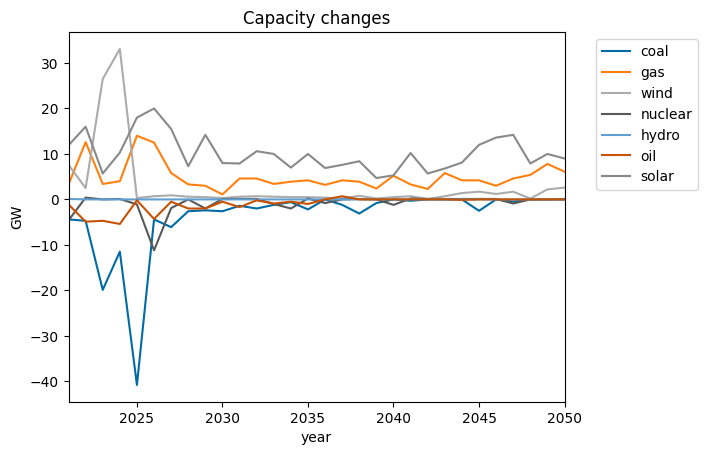

In [14]:
changes_cap = elec_gen.diff()  #capacity changes
changes_cap.plot()
plt.title("Capacity changes")
plt.xlabel("year")
plt.ylabel("GW")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([1, 30])
plt.show()

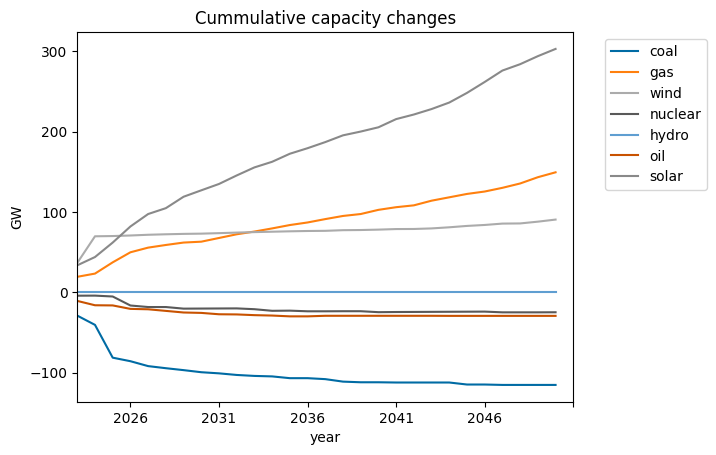

In [15]:
generation=changes_cap.iloc[1: , :].cumsum()
generation.plot()
plt.title("Cummulative capacity changes")
plt.xlabel("year")
plt.ylabel("GW")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([2, 30])
plt.show()
generation.to_csv('cap_cum_changes.csv')

In [16]:
changes_cap=changes_cap.iloc[1: , :]
changes_cap.head(2)

,coal,gas,wind,nuclear,hydro,oil,solar
2021,-4.4,3.3,7.6,-4.6,0.1,-1.1,11.9
2022,-4.7,12.6,2.5,0.4,0.0,-4.9,16.0


In [17]:
total_elec = elec_gen.sum(axis=1)

In [18]:
constructions = changes_cap[(changes_cap >0)].dropna(how='all', axis=1)
constructions = constructions.fillna(0)

In [19]:
decommission = changes_cap[(changes_cap < 0)].dropna(how='all', axis=1)
decommission = decommission.fillna(0)
decommissions=abs(decommission)

# read data from json files

In [19]:
#read json data 

path_to_json = cwd+'/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_data.json')]
    

def energy_frame_add(energy_frame, new_entry):
    energy_frame.loc[len(energy_frame.index)] = new_entry

def process_next_level(current_source, a, previous_keys, energy_frame):  #а - текущий уровень
    current_keys = a.keys() #keys to the deeper level 
    
    if "val" in current_keys:
        new_thing_to_add = [current_source] + previous_keys[1:] + [a["val"]] + [a["unit"]]  #excluding word "data"
#         print(new_thing_to_add)
        energy_frame_add(energy_frame, new_thing_to_add)
    else:
        for key in current_keys:
#             print(key)
            if key != "bib":
                process_next_level(current_source, a.get(key), previous_keys + [key], energy_frame)  # "a.get(key)"" - returns understructure (recursive structure). remembers previous keys but at the same time knows where it is 
    

# process_next_level(a_dict, energy_frame)
keys_list = []


# #create a data frame for info from json


In [28]:
energy_frame = pd.DataFrame(columns=[ "source", "stream",  "material", "value",  "unit"])
materials_portfolio = pd.DataFrame
df = list()

#energy_frame.add
for index, js in enumerate(json_files):
    file_path = os.path.join(path_to_json, js)    
    with open(file_path) as json_file:
        energy_data = pd.read_json(js)
        current_source = js.split('_')[0]
        #print(current_source)
        process_next_level(current_source, energy_data, keys_list, energy_frame)
        energy_frame
    energy_s = energy_frame.append(energy_frame, ignore_index=True)


NameError: name 'json_files' is not defined

In [21]:
energy_s = energy_s.drop_duplicates()
#energy_s[energy_s["material"].str.contains("refueling")==False]
energy_s.head(2)


NameError: name 'energy_s' is not defined

# Visualisations and results


In [20]:
del decommissions['oil']


In [21]:
#decom = decommissions.T
#decommissions

In [22]:
#decom.index.name = 'source'
#decom

In [23]:
del constructions['oil']

#constr= constructions.T

In [24]:
#constr.index.name = 'source'


In [60]:
energy_s = pd.read_csv(cwd+"//data//model_data_f.csv")




Calculate total need and waste per source 

In [73]:
total_waste=energy_s[energy_s['stream'].str.contains('waste')].groupby([ "source", "stream"],  as_index=False).sum()
total_need=energy_s[energy_s['stream'].str.contains('need')].groupby(["source", "stream"],  as_index=False).sum()


C:\Users\zhuss\AppData\Local\Temp\ipykernel_36836\4026182867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_waste=energy_s[energy_s['stream'].str.contains('waste')].groupby([ "source", "stream"],  as_index=False).sum()
C:\Users\zhuss\AppData\Local\Temp\ipykernel_36836\4026182867.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_need=energy_s[energy_s['stream'].str.contains('need')].groupby(["source", "stream"],  as_index=False).sum()


In [72]:
from bokeh.charts import Bar, output_file, show

ModuleNotFoundError: No module named 'bokeh.charts'

ImportError: cannot import name 'Bar' from 'bokeh' (C:\Users\zhuss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bokeh\__init__.py)

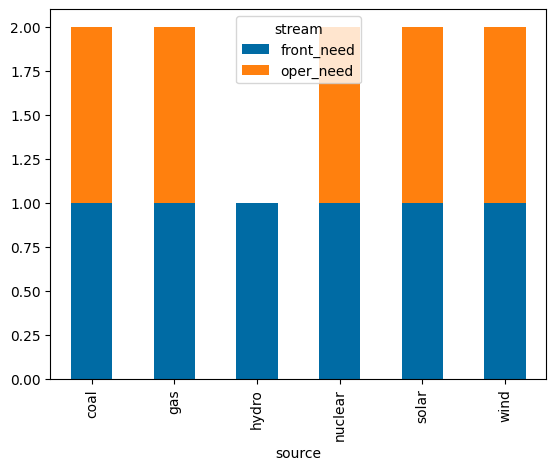

In [71]:
total_need.groupby(["source", "stream"]).size().unstack().plot(kind='bar', stacked=True)
from bokeh import Bar, output_file, show

bar = Bar(x, values='enrolments', label='class', stack='gender',
         title="Number of students enrolled per class",
         legend='top_right',bar_width=1.0)
output_file("myPlot.html")
show(bar)


In [26]:
total_waste_1=energy_s[energy_s['stream'].str.contains('waste')].groupby(["source"],  as_index=False).sum()
total_need_1=energy_s[energy_s['stream'].str.contains('need')].groupby(["source"],  as_index=False).sum()


C:\Users\zhuss\AppData\Local\Temp\ipykernel_36836\1151124545.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_waste=energy_s[energy_s['stream'].str.contains('waste')].groupby(["source"],  as_index=False).sum()
C:\Users\zhuss\AppData\Local\Temp\ipykernel_36836\1151124545.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_need=energy_s[energy_s['stream'].str.contains('need')].groupby(["source"],  as_index=False).sum()


In [32]:
total_waste

,source,amount (kg/MW),amount (kg/MWh),location mining,reference mining,coordinate processing,locaton processing,reference processing
0,coal,6.468696e+08,3497.992619,0.0,0.0,0.0,0.0,0.0
1,gas,1.385562e+08,620.271151,0.0,0.0,0.0,0.0,0.0
2,hydro,1.959888e+07,107.563228,0.0,0.0,0.0,0.0,0.0
3,nuclear,1.359513e+07,28.739926,0.0,0.0,0.0,0.0,0.0
4,solar,8.032682e+06,203.771749,0.0,0.0,0.0,0.0,0.0
5,wind,4.336258e+06,99.001320,0.0,0.0,0.0,0.0,0.0


In [76]:
plt.style.use('tableau-colorblind10')
ax = total_waste.plot.bar(x='source', y=['amount (kg/MWh)',"amount (kg/MW)"], color=['red', 'green'], rot=0)
ax.set_yscale('log')
plt.title("Waste generation per MW capacity and MWh electricity generated",fontweight ='bold', fontsize = 15)
plt.ylabel("kg", fontweight ='bold', fontsize = 15)
plt.xlabel("source", fontweight ='bold', fontsize = 15)
ax.set_facecolor('white')

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.savefig('./plots/barplot1.jpg', bbox_inches='tight', dpi=900)

SyntaxError: positional argument follows keyword argument (1634783563.py, line 2)

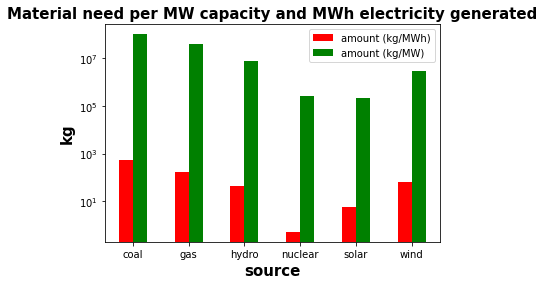

In [26]:
ax = total_need.plot.bar(x='source', y=['amount (kg/MWh)',"amount (kg/MW)"], color=['red', 'green'], rot=0)
ax.set_yscale('log')
plt.title("Material need per MW capacity and MWh electricity generated",fontweight ='bold', fontsize = 15)
plt.ylabel("kg", fontweight ='bold', fontsize = 15)
plt.xlabel("source", fontweight ='bold', fontsize = 15)
ax.set_facecolor('white')

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.savefig('./plots/barplot_feed.jpg', bbox_inches='tight', dpi=900)

In [27]:
total_front_need=energy_s[energy_s['stream'].str.match('front_need')].groupby(["source"], as_index=False).sum()
total_front_waste=energy_s[energy_s['stream'].str.match('front_waste')].groupby(["source"], as_index=False).sum()
total_oper_need=energy_s[energy_s['stream'].str.match('oper_need')].groupby(["source"], as_index=False).sum()
total_oper_waste=energy_s[energy_s['stream'].str.match('oper_waste')].groupby(["source"], as_index=False).sum()
total_back_waste=energy_s[energy_s['stream'].str.match('back_waste')].groupby(["source"], as_index=False).sum()
del gen['oil']


In [28]:
type(annual_oper_need)

NameError: name 'annual_oper_need' is not defined

In [ ]:
total_front_need
annual_constr_need=constructions*[1.293910e+05, 2.861319e+06, 2.042597e+05, 7.706588e+06, 2.132855e+05]
#annual_constr_need_tot = annual_constr_need.sum(axis=1) #in tons
#annual_constr_need_tot = annual_constr_need_tot.to_frame()
#annual_constr_need_tot.columns = ['constr_need']
annual_constr_need.columns = ['gas_con_need', 'wind_con_need', 'nuclear_con_need','hydro_con_need','solar_con_need']
annual_constr_need

,gas_con_need,wind_con_need,nuclear_con_need,hydro_con_need,solar_con_need
2021,426990.3,21746024.4,0.00,770658.8,2538097.45
2022,1630326.6,7153297.5,81703.88,0.0,3412568.00
2023,439929.4,75824953.5,0.00,0.0,1215727.35
2024,517564.0,94709658.9,20425.97,0.0,2196840.65
2025,1811474.0,858395.7,0.00,0.0,3839139.00
2026,1617387.5,2002923.3,0.00,0.0,4265710.00
2027,750467.8,2575187.1,0.00,0.0,3305925.25
2028,426990.3,1716791.4,0.00,0.0,1556984.15
2029,388173.0,1430659.5,0.00,0.0,3028654.10
2030,142330.1,858395.7,20425.97,0.0,1706284.00


In [ ]:
total_front_waste
annual_constr_waste=constructions*[5.773516e+04, 1.450864e+06, 5.885931e+06, 3.887562e+06, 7.657879e+06]
#annual_constr_waste_tot = annual_constr_waste.sum(axis=1) #in tons
#annual_constr_waste_tot = annual_constr_waste_tot.to_frame()
#annual_constr_waste_tot.columns= ['constr_waste']
annual_constr_waste.columns = ['gas_constr_waste', 'wind_constr_waste', 'nuclear_constr_waste','hydro_constr_waste','solar_constr_waste']
annual_constr_waste

,gas_constr_waste,wind_constr_waste,nuclear_constr_waste,hydro_constr_waste,solar_constr_waste
2021,190526.028,11026566.4,0.0,388756.2,91128760.1
2022,727463.016,3627160.0,2354372.4,0.0,122526064.0
2023,196299.544,38447896.0,0.0,0.0,43649910.3
2024,230940.640,48023598.4,588593.1,0.0,78876153.7
2025,808292.240,435259.2,0.0,0.0,137841822.0
2026,721689.500,1015604.8,0.0,0.0,153157580.0
2027,334863.928,1305777.6,0.0,0.0,118697124.5
2028,190526.028,870518.4,0.0,0.0,55902516.7
2029,173205.480,725432.0,0.0,0.0,108741881.8
2030,63508.676,435259.2,588593.1,0.0,61263032.0


In [ ]:
total_oper_need
annual_oper_need=gen*1000*[545,172.8,0.075434,0.097416,0, 0.175951]
#annual_oper_need_tot= annual_oper_need.sum(axis=1) #in tons
#annual_oper_need_tot = annual_oper_need_tot.to_frame()
#annual_oper_need_tot.columns= ['oper_need']
annual_oper_need.columns = ['coal_oper_need', 'gas_oper_need', 'wind_oper_need', 'nuclear_oper_need','hydro_oper_need','solar_oper_need']
annual_oper_need

,coal_oper_need,gas_oper_need,wind_oper_need,nuclear_oper_need,hydro_oper_need,solar_oper_need
2020,412020000.0,240192000.0,25798.4280,76471.560,0.0,14410.3869
2021,504125000.0,204249600.0,30309.3812,74133.576,0.0,19231.4443
2022,531920000.0,204595200.0,31139.1552,71795.592,0.0,24597.9498
2023,465975000.0,215308800.0,36555.3164,73062.000,0.0,26902.9079
2024,416380000.0,213580800.0,45305.6604,73354.248,0.0,31108.1368
2025,376050000.0,224640000.0,47206.5972,72574.920,0.0,38392.5082
2026,384770000.0,231033600.0,47402.7256,64197.144,0.0,47506.7700
2027,371690000.0,232761600.0,47659.2012,62833.320,0.0,54791.1414
2028,374415000.0,229478400.0,47847.7862,62833.320,0.0,58714.8487
2029,374960000.0,229132800.0,47998.6542,61372.080,0.0,64486.0415


In [ ]:
#bil KWh = 1000 000 MWh - numbers will be in 1000 ton/MWh 

In [ ]:
total_oper_waste
annual_oper_w=gen*1000*[2950.110300,446.05490,0.075434,15.336129,0, 0.175951]
#annual_oper_w_tot= annual_oper_w.sum(axis=1) #in tons
#annual_oper_w_tot= annual_oper_w_tot.to_frame()
#annual_oper_w_tot.columns= ['oper_waste']
annual_oper_w.columns = ['coal_oper_waste', 'gas_oper_waste', 'wind_oper_waste', 'nuclear_oper_waste','hydro_oper_waste','solar_oper_waste']


In [ ]:
total_back_waste
annual_decomissions=decommissions*[2.103808e+05,2.042597e+05]
#annual_decomissions_tot= annual_decomissions.sum(axis=1) #in tons
#annual_decomissions_tot=annual_decomissions_tot.to_frame()
#annual_decomissions_tot.columns = ['decom_waste']
annual_decomissions.columns = ['coal_decom_waste', 'nuclear_decom_waste']




In [ ]:
#tot_annual_flow= pd.merge(, left_index=True, right_index=True)
tot_annual_flow =#pd.concat([annual_constr_need_tot, annual_constr_waste_tot,annual_oper_need_tot,annual_oper_w_tot,annual_decomissions_tot], axis=1)

In [ ]:
tot_annual_flow = pd.concat([annual_constr_need,annual_constr_waste,annual_oper_need, annual_oper_w, annual_decomissions], axis=1)
tot_annual_flow 

,gas_con_need,wind_con_need,nuclear_con_need,hydro_con_need,solar_con_need,gas_constr_waste,wind_constr_waste,nuclear_constr_waste,hydro_constr_waste,solar_constr_waste,...,hydro_oper_need,solar_oper_need,coal_oper_waste,gas_oper_waste,wind_oper_waste,nuclear_oper_waste,hydro_oper_waste,solar_oper_waste,coal_decom_waste,nuclear_decom_waste
2021,426990.3,21746024.4,0.00,770658.8,2538097.45,190526.028,11026566.4,0.0,388756.2,91128760.1,...,0.0,19231.4443,2.728852e+09,527236891.8,30309.3812,1.167079e+07,0.0,19231.4443,925675.52,939594.62
2022,1630326.6,7153297.5,81703.88,0.0,3412568.00,727463.016,3627160.0,2354372.4,0.0,122526064.0,...,0.0,24597.9498,2.879308e+09,528129001.6,31139.1552,1.130273e+07,0.0,24597.9498,988789.76,0.00
2023,439929.4,75824953.5,0.00,0.0,1215727.35,196299.544,38447896.0,0.0,0.0,43649910.3,...,0.0,26902.9079,2.522344e+09,555784405.4,36555.3164,1.150210e+07,0.0,26902.9079,4186577.92,0.00
2024,517564.0,94709658.9,20425.97,0.0,2196840.65,230940.640,48023598.4,588593.1,0.0,78876153.7,...,0.0,31108.1368,2.253884e+09,551323856.4,45305.6604,1.154811e+07,0.0,31108.1368,2419379.20,0.00
2025,1811474.0,858395.7,0.00,0.0,3839139.00,808292.240,435259.2,0.0,0.0,137841822.0,...,0.0,38392.5082,2.035576e+09,579871370.0,47206.5972,1.142542e+07,0.0,38392.5082,8583536.64,224685.67
2026,1617387.5,2002923.3,0.00,0.0,4265710.00,721689.500,1015604.8,0.0,0.0,153157580.0,...,0.0,47506.7700,2.082778e+09,596375401.3,47402.7256,1.010651e+07,0.0,47506.7700,925675.52,2287708.64
2027,750467.8,2575187.1,0.00,0.0,3305925.25,334863.928,1305777.6,0.0,0.0,118697124.5,...,0.0,54791.1414,2.011975e+09,600835950.3,47659.2012,9.891803e+06,0.0,54791.1414,1283322.88,388093.43
2028,426990.3,1716791.4,0.00,0.0,1556984.15,190526.028,870518.4,0.0,0.0,55902516.7,...,0.0,58714.8487,2.026726e+09,592360907.2,47847.7862,9.891803e+06,0.0,58714.8487,546990.08,0.00
2029,388173.0,1430659.5,0.00,0.0,3028654.10,173205.480,725432.0,0.0,0.0,108741881.8,...,0.0,64486.0415,2.029676e+09,591468797.4,47998.6542,9.661761e+06,0.0,64486.0415,504913.92,408519.40
2030,142330.1,858395.7,20425.97,0.0,1706284.00,63508.676,435259.2,588593.1,0.0,61263032.0,...,0.0,68691.2704,2.003125e+09,581655589.6,48081.6316,9.661761e+06,0.0,68691.2704,546990.08,0.00


In [ ]:
cummulative_need = tot_annual_flow[["constr_need","oper_need"]].cumsum()
cummulative_waste = tot_annual_flow[["constr_waste", "oper_waste","decom_waste"]].cumsum()


In [ ]:
flow_n = tot_annual_flow.loc[:, tot_annual_flow.columns.str.contains('need')]
flow_w = tot_annual_flow.loc[:, tot_annual_flow.columns.str.contains('waste')]
flow_n.drop(flow_n.index[-1], inplace=True)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
flow_w.drop(flow_w.index[-1], inplace=True)
flow_w

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gas_constr_waste,wind_constr_waste,nuclear_constr_waste,hydro_constr_waste,solar_constr_waste,coal_oper_waste,gas_oper_waste,wind_oper_waste,nuclear_oper_waste,hydro_oper_waste,solar_oper_waste,coal_decom_waste,nuclear_decom_waste
2021,190526.028,11026566.4,0.0,388756.2,91128760.1,2.728852e+09,527236891.8,30309.3812,1.167079e+07,0.0,19231.4443,925675.52,939594.62
2022,727463.016,3627160.0,2354372.4,0.0,122526064.0,2.879308e+09,528129001.6,31139.1552,1.130273e+07,0.0,24597.9498,988789.76,0.00
2023,196299.544,38447896.0,0.0,0.0,43649910.3,2.522344e+09,555784405.4,36555.3164,1.150210e+07,0.0,26902.9079,4186577.92,0.00
2024,230940.640,48023598.4,588593.1,0.0,78876153.7,2.253884e+09,551323856.4,45305.6604,1.154811e+07,0.0,31108.1368,2419379.20,0.00
2025,808292.240,435259.2,0.0,0.0,137841822.0,2.035576e+09,579871370.0,47206.5972,1.142542e+07,0.0,38392.5082,8583536.64,224685.67
2026,721689.500,1015604.8,0.0,0.0,153157580.0,2.082778e+09,596375401.3,47402.7256,1.010651e+07,0.0,47506.7700,925675.52,2287708.64
2027,334863.928,1305777.6,0.0,0.0,118697124.5,2.011975e+09,600835950.3,47659.2012,9.891803e+06,0.0,54791.1414,1283322.88,388093.43
2028,190526.028,870518.4,0.0,0.0,55902516.7,2.026726e+09,592360907.2,47847.7862,9.891803e+06,0.0,58714.8487,546990.08,0.00
2029,173205.480,725432.0,0.0,0.0,108741881.8,2.029676e+09,591468797.4,47998.6542,9.661761e+06,0.0,64486.0415,504913.92,408519.40
2030,63508.676,435259.2,588593.1,0.0,61263032.0,2.003125e+09,581655589.6,48081.6316,9.661761e+06,0.0,68691.2704,546990.08,0.00


In [ ]:
flow_n.columns = flow_n.columns.str.split('_', expand=True)
flow_n  = flow_n.groupby(axis=1, level=0).sum()
flow_n 

,coal,gas,hydro,nuclear,solar,wind
2021,504125000.0,204676590.3,770658.8,74133.576,2.557329e+06,2.177633e+07
2022,531920000.0,206225526.6,0.0,153499.472,3.437166e+06,7.184437e+06
2023,465975000.0,215748729.4,0.0,73062.000,1.242630e+06,7.586151e+07
2024,416380000.0,214098364.0,0.0,93780.218,2.227949e+06,9.475496e+07
2025,376050000.0,226451474.0,0.0,72574.920,3.877532e+06,9.056023e+05
2026,384770000.0,232650987.5,0.0,64197.144,4.313217e+06,2.050326e+06
2027,371690000.0,233512067.8,0.0,62833.320,3.360716e+06,2.622846e+06
2028,374415000.0,229905390.3,0.0,62833.320,1.615699e+06,1.764639e+06
2029,374960000.0,229520973.0,0.0,61372.080,3.093140e+06,1.478658e+06
2030,370055000.0,225473530.1,0.0,81798.050,1.774975e+06,9.064773e+05


In [ ]:
flow_w.columns = flow_w.columns.str.split('_', expand=True)
flow_w  = flow_w.groupby(axis=1, level=0).sum()

In [ ]:
flow_n_r = flow_n[["nuclear", "hydro", "wind", "solar"]]
flow_w_r = flow_w[["nuclear", "hydro", "wind", "solar"]]

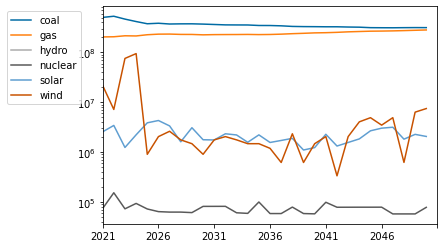

In [ ]:
plt.style.use('tableau-colorblind10')
flow_n.plot()
plt.rc('axes')
plt.yscale('log')
plt.xlim([0, 30])
fontsize = 12
#plt.title("Capacity", fontsize = fontsize)
#plt.xlabel("year", fontsize = 10)
#plt.ylabel("GW", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/flow.jpg', bbox_inches='tight', dpi=900)

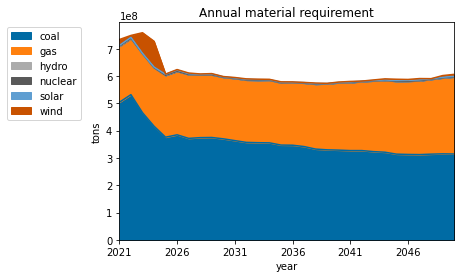

In [ ]:
plt.style.use('tableau-colorblind10')
flow_n.plot.area()
plt.rc('axes')
plt.xlim([0, 29])
fontsize = 12
plt.title("Annual material requirement", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("tons", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/annual_need.jpg', bbox_inches='tight', dpi=900)

In [29]:
plt.style.use('tableau-colorblind10')
flow_w.plot.area()
plt.rc('axes')
plt.xlim([0, 29])
fontsize = 12
plt.title("Annual waste generation", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("tons", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/annual_waste.jpg', bbox_inches='tight', dpi=900)

NameError: name 'flow_w' is not defined

In [30]:
plt.style.use('tableau-colorblind10')
flow_n[["nuclear", "hydro", "solar", "wind"]].plot.area()
plt.rc('axes')
plt.xlim([0, 29])
fontsize = 12
plt.title("Annual material requirement for carbon neutral sources", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("tons", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/annual_need_green.jpg', bbox_inches='tight', dpi=900)

NameError: name 'flow_n' is not defined

In [31]:
plt.style.use('tableau-colorblind10')
flow_w_r.plot.area()
plt.rc('axes')
plt.xlim([0, 29])
fontsize = 12
plt.title("Annual waste generation from carbon neutral sources", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("tons", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/annual_waste_green.jpg', bbox_inches='tight', dpi=900)

NameError: name 'flow_w_r' is not defined

In [32]:
plt.style.use('tableau-colorblind10')
flow_w.plot()
plt.rc('axes')
plt.yscale('log')
plt.xlim([0, 30])
fontsize = 12
#plt.title("Capacity", fontsize = fontsize)
#plt.xlabel("year", fontsize = 10)
#plt.ylabel("GW", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/flow.jpg', bbox_inches='tight', dpi=900)

NameError: name 'flow_w' is not defined

In [33]:
total_front_waste=energy_s[energy_s['stream'].str.match('front_waste')]
total_back_waste=energy_s[energy_s['stream'].str.match('back_waste')]
total_oper_waste=energy_s[energy_s['stream'].str.match('oper_waste')]
total_front_need=energy_s[energy_s['stream'].str.match('front_need')]
total_back_need=energy_s[energy_s['stream'].str.match('back_need')]
total_oper_need=energy_s[energy_s['stream'].str.match('oper_need')]

# Material Demand Timeseries

In [34]:
mats = energy_s['material'].unique()
len(mats)


97

In [35]:
energy_s_front_need=energy_s[energy_s['stream'].str.match('front_need')]
energy_s_front_waste=energy_s[energy_s['stream'].str.match('front_waste')]
energy_s_back_waste =energy_s[energy_s['stream'].str.match('back_waste')]

# Materials visualizations

In [36]:
plotdata= energy_s_front_need
plotdata.head(2)

,source,stream,material,amount (kg/MW),amount (kg/MWh),coordinate mining site,location mining,reference mining,coordinate processing,locaton processing,reference processing
3,gas,front_need,aluminum,204.0000,0.000913,"(31.0069,-88.0103)",NaN,NaN,NaN,NaN,NaN
4,hydro,front_need,aluminum,1585.2096,0.008700,"(59.4545,-135.3131)",NaN,NaN,NaN,NaN,NaN


In [37]:
cm = plt.get_cmap('nipy_spectral')

In [38]:
gas = energy_s_front_need[energy_s_front_need["source"].str.match('gas')]
gas

,source,stream,material,amount (kg/MW),amount (kg/MWh),coordinate mining site,location mining,reference mining,coordinate processing,locaton processing,reference processing
3,gas,front_need,aluminum,204.0,0.000913,"(31.0069,-88.0103)",NaN,NaN,NaN,NaN,NaN
43,gas,front_need,concrete,97749.0,0.437591,"(31.0069,-88.0103)",NaN,NaN,NaN,NaN,NaN
98,gas,front_need,iron,31438.0,0.140738,"(31.0069,-88.0103)",NaN,NaN,NaN,NaN,NaN


In [39]:
import plotly.express as px
 
fn = energy_s_front_need

fig = px.bar(fn, x="source", y="amount (kg/MW)", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [40]:
import plotly.express as px
 
fw= energy_s_front_waste

fig = px.bar(fw, x="source", y="amount (kg/MW)", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [41]:
bw= energy_s_back_waste

fig = px.bar(bw, x="source", y="amount (kg/MW)", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

# Materials heatmap

In [42]:
energy_s_front_need_m = fn.groupby(["source","material"]).size().unstack(level=0)



In [43]:
energy_s_front_waste_m = fw.groupby(["source","material"]).size().unstack(level=0)


In [44]:
fnMW=energy_s_front_need[['material','source','amount (kg/MW)']]
fn_MWh=energy_s_front_need[['material','source','amount (kg/MWh)']]

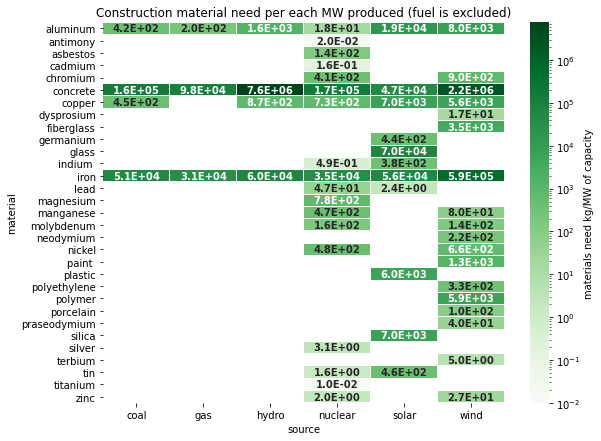

In [45]:
from matplotlib.colors import LogNorm, Normalize

#plt.style.use('tableau-colorblind10')


plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True,cmap = 'Greens', cbar_kws={'label': 'materials need kg/MW of capacity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MW produced (fuel is excluded)")
plt.savefig('./plots/front_need_MW_heatmap_n.jpg', bbox_inches='tight', dpi=900)

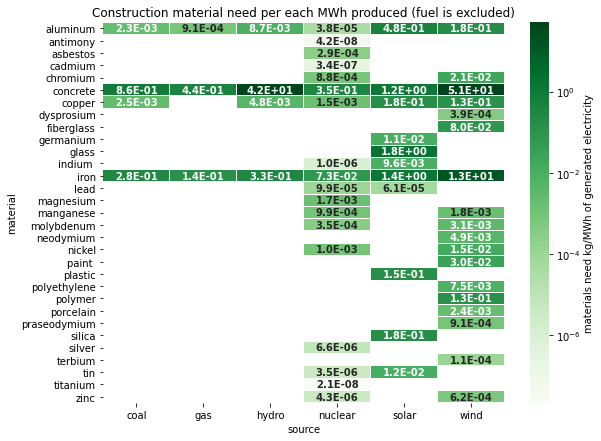

In [46]:
from matplotlib.colors import LogNorm, Normalize

#plt.style.use('tableau-colorblind10')


plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MWh)')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True,cmap = 'Greens', cbar_kws={'label': 'materials need kg/MWh of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MWh produced (fuel is excluded)")
plt.savefig('./plots/front_need_MWh_heatmap_n.jpg', bbox_inches='tight', dpi=900)

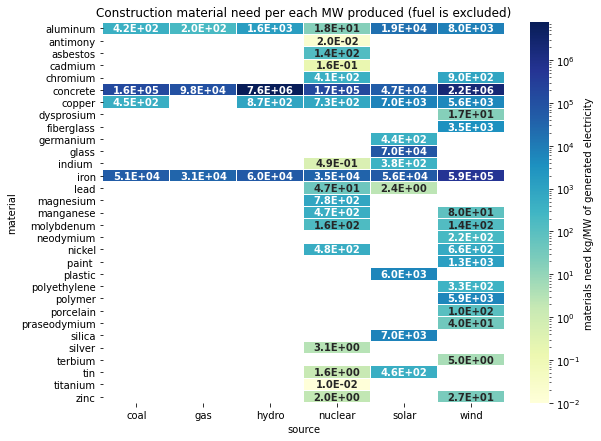

In [47]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True, cmap="YlGnBu", cbar_kws={'label': 'materials need kg/MW of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MW produced (fuel is excluded)")
plt.savefig('./plots/front_need_MW_heatmap.jpg', bbox_inches='tight')


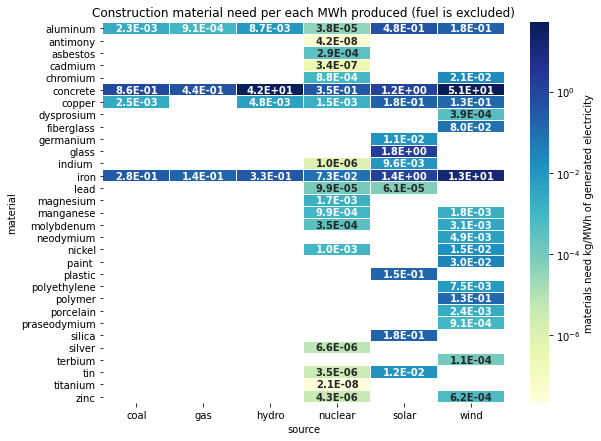

In [48]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(9,7))
fn2=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MWh)')

sns.heatmap(fn2,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True, cmap="YlGnBu", cbar_kws={'label': 'materials need kg/MWh of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MWh produced (fuel is excluded)")
plt.savefig('./plots/front_need_MWh_heatmap.jpg', bbox_inches='tight')

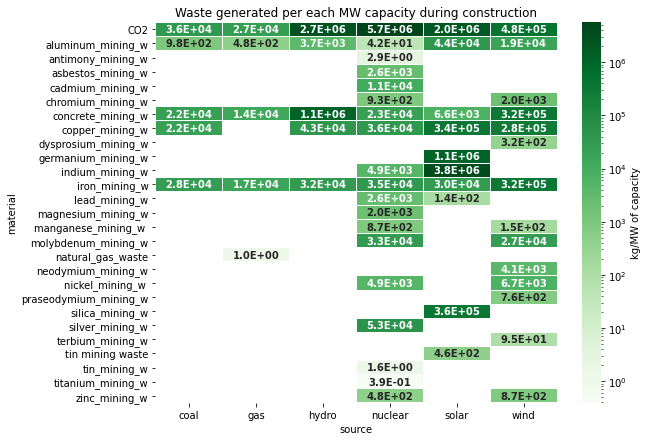

In [49]:

plt.figure(figsize=(9,7))

#plt.style.use('tableau-colorblind10')

fw1=fw.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(fw1,  annot=True, fmt='.1E',cmap = 'Greens', cbar_kws={'label': 'kg/MW of capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Waste generated per each MW capacity during construction")
plt.savefig('./plots/front_waste_heatmap_n.jpg', bbox_inches='tight', dpi=900)

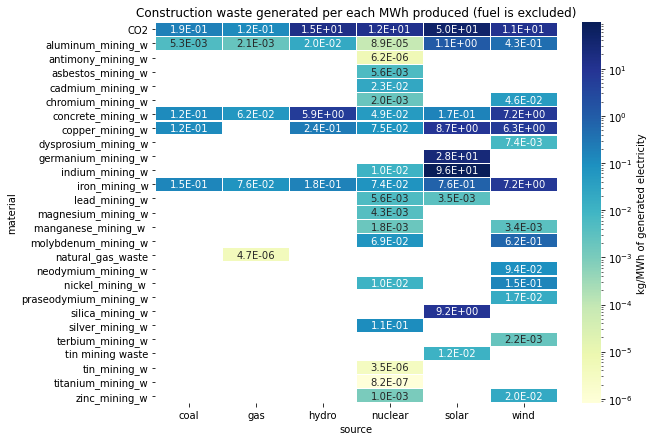

In [50]:

plt.figure(figsize=(9,7))
df1=energy_s_front_waste.pivot(index='material', columns='source', values='amount (kg/MWh)')

sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'kg/MWh of generated electricity'},
            norm=LogNorm(), linewidth=0.2)
plt.title("Construction waste generated per each MWh produced (fuel is excluded)")
plt.savefig('./plots/front_wasteMWh_heatmap_1.jpg', bbox_inches='tight', dpi=900)

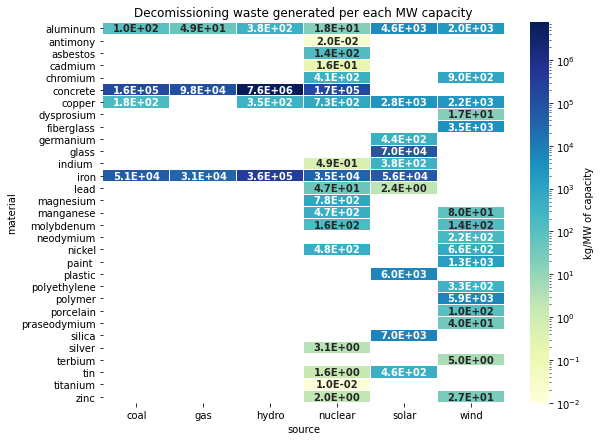

In [51]:

plt.figure(figsize=(9,7))
df1=energy_s_back_waste.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'kg/MW of capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Decomissioning waste generated per each MW capacity")
plt.savefig('./plots/back_wasteMW_heatmap.jpg', bbox_inches='tight')

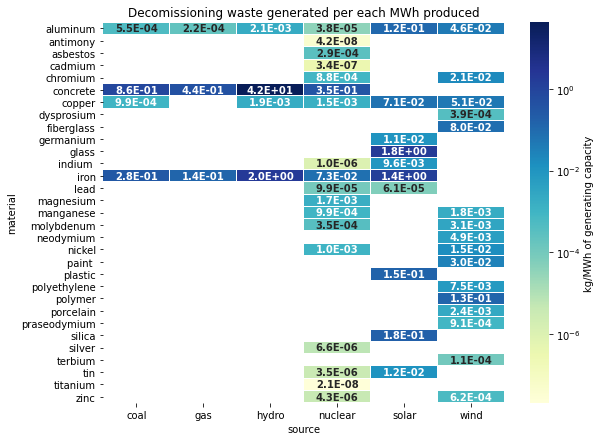

In [52]:

plt.figure(figsize=(9,7))
df1=energy_s_back_waste.pivot(index='material', columns='source', values='amount (kg/MWh)')
sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'kg/MWh of generating capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Decomissioning waste generated per each MWh produced")
plt.savefig('./plots/back_waste_heatmapMWH.jpg', bbox_inches='tight')

# Plot cumulative material flow

In [53]:
needed_i = np.array(energy_s_front_waste["source"].drop_duplicates()) 
columns = np.array(energy_s_front_waste["material"].drop_duplicates())

In [54]:
needed_i = np.array(energy_s[energy_s['stream'].str.match('front_waste')]["source"].drop_duplicates())
columns = np.array(energy_s[energy_s['stream'].str.match('front_waste')]["material"].drop_duplicates())

In [55]:
df=energy_s[energy_s['stream'].str.match('front_waste')].pivot(index='material', columns='source', values='amount (kg/MW)')

In [56]:
df =df.fillna(0).astype(np.int64)

In [57]:
df_front_waste =energy_s_front_waste.pivot(index='material', columns='source', values='amount (kg/MW)').fillna(0)
df_back_waste =energy_s_back_waste.pivot(index='material', columns='source', values='amount (kg/MW)').fillna(0)
df_front_need =energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MW)').fillna(0)

In [58]:
total_change=elec_gen.agg(lambda x: x.iat[-1] - x.iat[0]).reset_index(name='diff')

In [59]:
total_change.columns=['source',"total change"]
total_change["total change"]=total_change["total change"].astype(float)

In [60]:
tot_constructions = total_change[(total_change["total change"] > 0)]
tot_decom = total_change[(total_change["total change"] < 0)]


In [61]:
tot_decom=tot_decom.T
tot_decom

,0,3,5
source,coal,nuclear,oil
total change,-115.2,-24.8,-29.3


In [62]:
tot_constructions

,source,total change
1,gas,149.3
2,wind,90.5
4,hydro,0.1
6,solar,302.8


In [63]:
two_year= elec_gen.iloc[[0, 30],:]
two_year

,coal,gas,wind,nuclear,hydro,oil,solar
2020,217.3,245.4,126.5,97.1,79.2,72.6,48.5
2050,102.1,394.7,217.0,72.3,79.3,43.3,351.3


In [64]:
two_year["hydro"][0]* df_front_waste["hydro"]

material
CO2                      2.164631e+08
aluminum_mining_w        2.929467e+05
antimony_mining_w        0.000000e+00
asbestos_mining_w        0.000000e+00
cadmium_mining_w         0.000000e+00
chromium_mining_w        0.000000e+00
concrete_mining_w        8.518046e+07
copper_mining_w          3.394141e+06
dysprosium_mining_w      0.000000e+00
germanium_mining_w       0.000000e+00
indium_mining_w          0.000000e+00
iron_mining_w            2.564255e+06
lead_mining_w            0.000000e+00
magnesium_mining_w       0.000000e+00
manganese_mining_w       0.000000e+00
molybdenum_mining_w      0.000000e+00
natural_gas_waste        0.000000e+00
neodymium_mining_w       0.000000e+00
nickel_mining_w          0.000000e+00
praseodymium_mining_w    0.000000e+00
silica_mining_w          0.000000e+00
silver_mining_w          0.000000e+00
terbium_mining_w         0.000000e+00
tin mining waste         0.000000e+00
tin_mining_w             0.000000e+00
titanium_mining_w        0.000000e+00
zin

In [65]:
front_w2020=[]
front_w2025=[]
front_n2025=[]
back_w2025=[]

front_n2020=[]
back_w2020=[]
for i in needed_i:

    fw2020 =df_front_waste[str(i)]*two_year[str(i)][0]
    bw2020 = df_back_waste[str(i)]*two_year[str(i)][0]
    fn2020 = df_front_need[str(i)]*two_year[str(i)][0]
    fw2025 =df_front_waste[str(i)]*two_year[str(i)][1]
    bw2025 = df_back_waste[str(i)]*two_year[str(i)][1]
    fn2025 = df_front_need[str(i)]*two_year[str(i)][1]

    front_w2020.append(fw2020)
    front_n2020.append(fn2020)
    back_w2020.append(bw2020)
    front_w2025.append(fw2025)
    front_n2025.append(fn2025)
    back_w2025.append(bw2025)
    
front_w2020= pd.concat(front_w2020, axis=1)
front_n2020= pd.concat(front_n2020, axis=1)
back_w2020= pd.concat(back_w2020, axis=1)
front_w2025= pd.concat(front_w2025, axis=1)
front_n2025= pd.concat(front_n2025, axis=1)
back_w2025= pd.concat(back_w2025, axis=1)

In [66]:
diff_front_w2025 = front_w2025 - front_w2020
diff_front_n2025 = front_n2025 - front_n2020
diff_back_w2025 =back_w2025 - back_w2020
constr_need = diff_front_n2025[["wind", "hydro", "solar","gas"]]  
constr_waste = diff_front_w2025[["wind", "hydro", "solar", "gas"]] 
decom = abs(diff_back_w2025[["coal", "nuclear"]])    

In [67]:
constr_need.reset_index()
constr_need = constr_need.T
constr_need

material,aluminum,antimony,asbestos,cadmium,chromium,concrete,copper,dysprosium,fiberglass,germanium,...,polyethylene,polymer,porcelain,praseodymium,silica,silver,terbium,tin,titanium,zinc
wind,7.264254e+05,0.0,0.0,0.0,81631.0,203299200.0,5.086442e+05,1538.5,315917.4,0.0,...,29810.7,532864.0,9500.69,3620.0,0.0,0.0,452.5,0.00,0.0,2441.9072
hydro,1.585210e+02,0.0,0.0,0.0,0.0,764400.0,8.745984e+01,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0000
solar,5.753200e+06,0.0,0.0,0.0,0.0,14231600.0,2.119600e+06,0.0,0.0,133232.0,...,0.0,0.0,0.00,0.0,2119600.0,0.0,0.0,140226.68,0.0,0.0000
gas,3.045720e+04,0.0,0.0,0.0,0.0,14593925.7,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0000


In [68]:
constr_waste.reset_index()
constr_waste = constr_waste.T
constr_waste

material,CO2,aluminum_mining_w,antimony_mining_w,asbestos_mining_w,cadmium_mining_w,chromium_mining_w,concrete_mining_w,copper_mining_w,dysprosium_mining_w,germanium_mining_w,...,neodymium_mining_w,nickel_mining_w,praseodymium_mining_w,silica_mining_w,silver_mining_w,terbium_mining_w,tin mining waste,tin_mining_w,titanium_mining_w,zinc_mining_w
wind,4.360290e+07,1.694993e+06,0.0,0.0,0.0,183232.724866,2.860420e+07,2.492356e+07,29231.5,0.0,...,371412.0,607047.855545,68780.0,0.0,0.0,8597.5,0.00,0.0,0.0,78954.999464
hydro,2.733120e+05,3.698822e+02,0.0,0.0,0.0,0.000000,1.075511e+05,4.285532e+03,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
solar,5.968188e+08,1.342413e+07,0.0,0.0,0.0,0.000000,2.002386e+06,1.038604e+08,0.0,332946768.0,...,0.0,0.000000,0.0,109916400.0,0.0,0.0,140226.68,0.0,0.0,0.000000
gas,3.967899e+06,7.106680e+04,0.0,0.0,0.0,0.000000,2.053365e+06,0.000000e+00,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000


In [69]:
decom.reset_index()
decom = decom.T
decom

material,aluminum,antimony,asbestos,cadmium,chromium,concrete,copper,dysprosium,fiberglass,germanium,...,polyethylene,polymer,porcelain,praseodymium,silica,silver,terbium,tin,titanium,zinc
coal,11584.512,0.000,0.000,0.000,0.00,1.828892e+07,20920.320,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000
nuclear,448.136,0.496,3428.352,3.968,10288.28,4.125447e+06,17997.608,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77.376,0.0,40.672,0.248,50.096


In [70]:
import copy
newdf1 = copy.deepcopy(constr_waste)
for i in list(constr_waste):
    if sum(constr_waste[i]) == 0:
        newdf1 = newdf1.drop(i, axis=1)
newdf1

material,CO2,aluminum_mining_w,chromium_mining_w,concrete_mining_w,copper_mining_w,dysprosium_mining_w,germanium_mining_w,indium_mining_w,iron_mining_w,lead_mining_w,manganese_mining_w,molybdenum_mining_w,natural_gas_waste,neodymium_mining_w,nickel_mining_w,praseodymium_mining_w,silica_mining_w,terbium_mining_w,tin mining waste,zinc_mining_w
wind,4.360290e+07,1.694993e+06,183232.724866,2.860420e+07,2.492356e+07,29231.5,0.0,0.000000e+00,2.865664e+07,0.000000,13529.75,2460097.7,0.000000,371412.0,607047.855545,68780.0,0.0,8597.5,0.00,78954.999464
hydro,2.733120e+05,3.698822e+02,0.000000,1.075511e+05,4.285532e+03,0.0,0.0,0.000000e+00,3.237696e+03,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000
solar,5.968188e+08,1.342413e+07,0.000000,2.002386e+06,1.038604e+08,0.0,332946768.0,1.150525e+09,9.130585e+06,41231.709552,0.00,0.0,0.000000,0.0,0.000000,0.0,109916400.0,0.0,140226.68,0.000000
gas,3.967899e+06,7.106680e+04,0.000000,2.053365e+06,0.000000e+00,0.0,0.0,0.000000e+00,2.527373e+06,0.000000,0.00,0.0,155.811055,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000


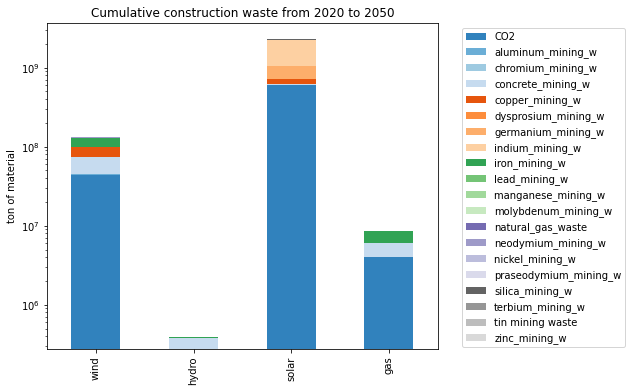

In [71]:
plt.style.use('tableau-colorblind10')
newdf1.plot(kind="bar", stacked=True, colormap = "tab20c", figsize=(7,6))
plt.title("Cumulative construction waste from 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("ton of material")
#plt.yscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./plots/waste_const_cumulative.jpg', bbox_inches='tight')

In [236]:
newdf2 = copy.deepcopy(decom)
for i in list(decom):
    if sum(decom[i]) == 0:
        newdf2 = newdf2.drop(i, axis=1)
newdf2

material,aluminum,antimony,asbestos,cadmium,chromium,concrete,copper,indium,iron,lead,magnesium,manganese,molybdenum,nickel,silver,tin,titanium,zinc
coal,11584.512,0.000,0.000,0.000,0.00,1.828892e+07,20920.320,0.000,5.914447e+06,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
nuclear,448.136,0.496,3428.352,3.968,10288.28,4.125447e+06,17997.608,12.152,8.596248e+05,1156.92,19403.024,11590.528,4058.768,12011.632,77.376,40.672,0.248,50.096


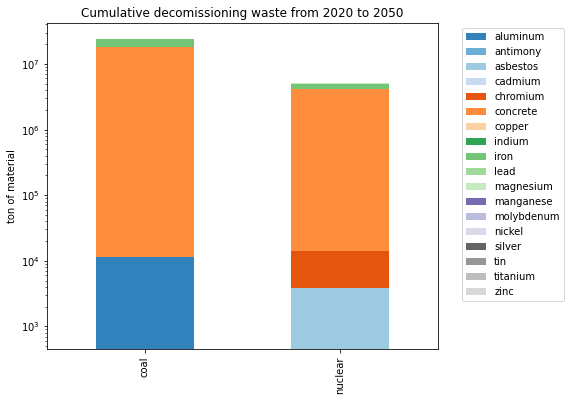

In [226]:

newdf2.plot(kind="bar", stacked=True, colormap='tab20c', figsize=(7,6))
plt.title("Cumulative decomissioning waste from 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("ton of material")
#plt.yscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./plots/waste_decom_cumulative.jpg', bbox_inches='tight')

In [222]:
#constr_need = constr_need.drop('hydro', axis=0)

In [237]:
newdf = copy.deepcopy(constr_need)
for i in list(constr_need):
    if sum(constr_need[i]) == 0:
        newdf = newdf.drop(i, axis=1)       

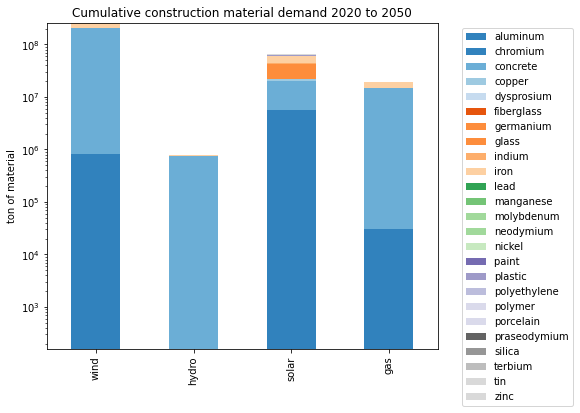

In [239]:

newdf.plot(kind="bar", stacked=True, colormap='tab20c', figsize=(7,6))

plt.title("Cumulative construction material demand 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("ton of material")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./plots/construction_cumulative.jpg', bbox_inches='tight')


# Plot total material flow 

In [240]:
mats = list(mats)
mats

['aluminum',
 'iron',
 'concrete',
 'iron_mining_w',
 'natural_gas_waste',
 'aluminum_mining_w',
 'concrete_mining_w',
 'CO2',
 'natural_gas',
 'coal',
 'oil',
 'limestone ',
 'NH3',
 'SOx',
 'NMHCs',
 'NOx',
 'CO',
 'particulates',
 'formaldehyde',
 'methane leak',
 'benzene',
 'H2S',
 'copper_mining_w',
 'copper',
 'lime_mining_w',
 'lime_FGC',
 'antimony',
 'arsenic',
 'barium',
 'beryllium',
 'boron',
 'cadmium',
 'chromium',
 'cobalt',
 'lead',
 'manganese',
 'mercury',
 'molybdenum',
 'nickel',
 'selenium',
 'vanadium',
 'ash',
 'VOC',
 'FGC',
 'coal_mining_w',
 'dysprosium',
 'fiberglass',
 'neodymium',
 'paint ',
 'polyethylene',
 'polymer',
 'porcelain',
 'praseodymium',
 'terbium',
 'zinc',
 'zinc_mining_w',
 'neodymium_mining_w',
 'praseodymium_mining_w',
 'terbium_mining_w',
 'dysprosium_mining_w',
 'chromium_mining_w',
 'manganese_mining_w ',
 'molybdenum_mining_w',
 'nickel_mining_w ',
 'lubricant',
 'silica_mining_w',
 'germanium_mining_w',
 'indium_mining_w',
 'lead_min

In [ ]:
# (df) generation
# (df) energy_s

mats = list(mats)
years = list(gen.index)[1:]
arr = np.zeros((len(energy_s['source'].unique()), len(years), len(mats)))

# material demand
#####
# for each year
for yearindx, year in enumerate(years): # indx 1
    for source_indx, source in enumerate(energy_s['source'].unique()): # indx 0
        tmpdf = energy_s[energy_s['source'] == source]
        
        # MW
        if source in list(constructions):
            constructed = constructions.loc[str(year)][source] * 1e3 #MW from GW
        else:
            constructed = 0
        if source in list(decommission):
            decommissioned = decommission.loc[str(year)][source] * 1e3
        else:
            decommissioned = 0
            
        # MWh
        if source in list(gen):
            generated = gen.loc[str(year)][source] * 1e6
        else:
            generated = 0
        
        #print(source)
        # get construction demand in kg
        tmpdf2 = tmpdf[tmpdf['stream'] == 'front_need']
        for rownum, row in tmpdf2.iterrows():
            
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * constructed #kg
            arr[source_indx, yearindx, mat_index] += val
            

        # get decommission demand in kg
        tmpdf3 = tmpdf[tmpdf['stream'] == 'back_need']
        for rownum, row in tmpdf3.iterrows():
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * decommissioned # kg 
            arr[source_indx, yearindx, mat_index] += val
        
        # get operational demand in kg
        tmpdf4 = tmpdf[tmpdf['stream'] == 'oper_need']
        for rownum, row in tmpdf4.iterrows():
            mat_index = mats.index(row['material'])
            # kg / MWh
            val = row['amount (kg/MW)'] * generated # kg
            arr[source_indx, yearindx, mat_index] += val


In [ ]:
arr.shape

(6, 30, 97)

In [ ]:
bot = np.zeros(len(years))
import matplotlib.pylab as pl
n = 47
colors = pl.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,10))
for i in range(per_mat.shape[1]):
    y = np.cumsum(per_mat[:, i])
    label = mats[i]
    x = [int(q) for q in years]
    plt.plot(x, y, label=label, color=colors[i])
    # plt.bar(x, y, bottom=bot, label=label)
    bot += y

per_mat = np.sum(arr, axis=0)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.ylabel("kg of material")
plt.xlabel("year")
#plt.rcParams['axes.facecolor'] = 'white'
plt.xlim([2021,2050])
#plt.rcParams['axes.facecolor'] = 'white'
plt.yscale('log')

plt.title('Material demand for increasing capacity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



NameError: name 'per_mat' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
mats = list(mats)

years = list(gen.index)[1:]

arr = np.zeros((len(energy_s['source'].unique()), len(years), len(mats)))

# material demand
#####
# for each year
for yearindx, year in enumerate(years): # indx 1
    for source_indx, source in enumerate(energy_s['source'].unique()): # indx 0
        tmpdf = energy_s[energy_s['source'] == source]
        
        # MW
        if source in list(constructions):
            constructed = constructions.loc[str(year)][source] * 1e3
        else:
            constructed = 0
        if source in list(decommission):
            decommissioned = decommission.loc[str(year)][source] * 1e3
        else:
            decommissioned = 0
            
        # MWh
        if source in list(gen):
            generated = gen.loc[str(year)][source] * 1e6
        else:
            generated = 0
        
        print(source)
        # get construction waste in kg
        tmpdf2 = tmpdf[tmpdf['stream'] == 'front_waste']
        for rownum, row in tmpdf2.iterrows():
            
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * constructed #kg
            arr[source_indx, yearindx, mat_index] += val
            

        # get decommission waste in kg
        tmpdf3 = tmpdf[tmpdf['stream'] == 'back_waste']
        for rownum, row in tmpdf3.iterrows():
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * decommissioned # kg 
            arr[source_indx, yearindx, mat_index] += val
        
        # get operational waste in kg
        tmpdf4 = tmpdf[tmpdf['stream'] == 'oper_waste']
        for rownum, row in tmpdf4.iterrows():
            mat_index = mats.index(row['material'])
            # kg / MWh
            val = row['amount (kg/MW)'] * generated # kg
            arr[source_indx, yearindx, mat_index] += val

gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal

In [ ]:
# arr # kg
bot = np.zeros(len(years))
n = 47
colors = pl.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,10))
for i in range(per_mat.shape[1]):
    y = np.cumsum(per_mat[:, i])
    label = mats[i]
    x = [int(q) for q in years]
    plt.plot(x, y, label=label, color=colors[i])
    # plt.bar(x, y, bottom=bot, label=label)
    bot += y

per_mat = np.sum(arr, axis=0)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
plt.ylabel("kg of material")
plt.xlabel("year")
plt.xlim([2021,2050])

plt.yscale('log')
plt.title('Waste generation with increasing capacity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

NameError: name 'per_mat' is not defined

<Figure size 720x720 with 0 Axes>